In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from dataloader_module import load_data
from metrics_module import metrics
import pandas as pd
import numpy as np

## Càrrega i pre-processament de les dades

In [4]:
datafile = "data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalització i búsqueda dels millors paràmetres per SVM amb GridSearch

In [6]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'], 
    'gamma': [1, 0.1, 0.01] 
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9575694355968913


## Aplicació dels millors paràmetres al model

Accuracy: 0.9697
Precision: 0.9519
Recall: 0.9906
F1 Score: 0.9708


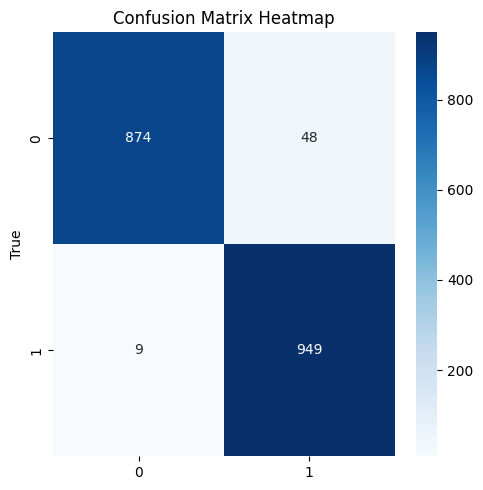

In [7]:

svm = grid_search.best_estimator_
y_pred = svm.predict(X_test)

np.save('predictions/predictions_svm.npy', y_pred)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

In [8]:
# Obtenir els coeficients del model SVM amb kernel lineal
if grid_search.best_params_['kernel'] == 'linear':
    feature_importances = grid_search.best_estimator_.coef_[0]
    
    # Crear un DataFrame amb les característiques i les seves importàncies
    feature_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })
    
    # Ordenar el DataFrame per importància
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Visualitzar les importàncies en un gràfic de barres
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
    plt.xlabel('Importància')
    plt.ylabel('Característica')
    plt.title('Importància de les característiques en el SVM')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("La importància de les característiques només es pot mostrar per a un kernel lineal.")

La importància de les característiques només es pot mostrar per a un kernel lineal.
